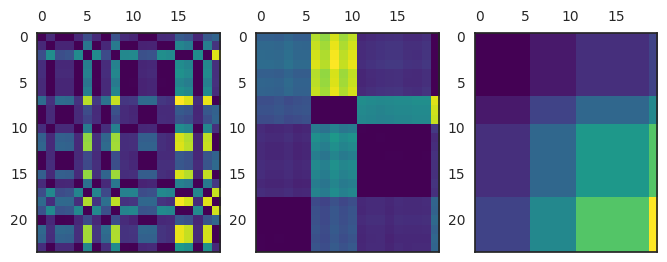

In [95]:
import itertools
import numpy as np
import sklearn
from sklearn.cluster.bicluster import SpectralBiclustering
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')
plt.rcParams['image.cmap'] = 'viridis'
%matplotlib inline

properties = ['salt', 'roast', 'grease', 'crunch']

clusters = {
    'more-is-more': [1., 1., 1., .1],
    'natural': [0., 0.1, 0.1, 0.4],
    'ok-but-too-salt': [0.8, 0.5, 0.5, .5],
    'dry-and-soft': [0.5, 0.5, 0.1, 0.2]
}

M = 24
N = 20

def nut_generator(clusters):
    cluster_names = list(clusters.keys())
    while True:
        yield clusters[np.random.choice(cluster_names)] + 0.1 * np.random.random(len(properties))

ng = nut_generator(clusters)
people_raw = np.stack([next(ng) for i in range(M)])
nuts_raw = np.stack([next(ng) for j in range(N)])

nuts = pd.DataFrame(nuts_raw, columns=properties, index=['N{}'.format(i+1) for i in range(len(nuts_raw))])

def make_scores(people, nuts):
    scores = np.zeros((M, N))
    for (i, p), (j, n) in itertools.product(enumerate(people), enumerate(nuts)):
        closeness = sum((p - n) ** 2)
        scores[i, j] = closeness
    return scores

def fit_model(scores, n_clusters):
    model = SpectralBiclustering(
        n_clusters=n_clusters, method='log', random_state=0)
    model.fit(scores)
    return model

def sort_scores(scores, model):
    sorted_scores = scores[np.argsort(model.row_labels_)]
    sorted_scores = sorted_scores[:, np.argsort(model.column_labels_)]
    return sorted_scores
    
def simulate_and_plot(scores, n_clusters):
    model = fit_model(scores, n_clusters)
    sorted_scores = sort_scores(scores, model)

    fig, ax = plt.subplots(1, 3, figsize=(8, 10))
    ax[0].matshow(scores)
    ax[1].matshow(sorted_scores)
    
    ax[2].matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1))

simulate_and_plot(make_scores(people, nuts_raw), (4, 4))

In [96]:
m = fit_model(make_scores(people, nuts_raw), (4, 4))

In [97]:
m.row_labels_

array([3, 2, 1, 2, 2, 2, 2, 0, 3, 3, 2, 0, 0, 3, 3, 0, 2, 1, 0, 1, 3, 0, 0,
       2], dtype=int32)

In [98]:
m.column_labels_

array([0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 3], dtype=int32)

In [99]:
nuts

,salt,roast,grease,crunch
N1,0.823446,0.591689,0.573003,0.593908
N2,0.521152,0.536711,0.138128,0.277288
N3,0.845993,0.596381,0.531673,0.559427
N4,0.832587,0.599149,0.516253,0.592320
N5,0.529796,0.526558,0.153465,0.251241
N6,1.029036,1.054892,1.016994,0.185929
N7,0.574254,0.520729,0.130666,0.215469
N8,0.873453,0.597971,0.554813,0.564185
N9,1.035648,1.005801,1.073131,0.142814
N10,0.506173,0.585417,0.162710,0.240441


In [100]:
pca = sklearn.decomposition.PCA(len(properties))
pca.fit(nuts)
pca.fit_transform(nuts)

array([[-0.04349491, -0.2948139 , -0.011634  , -0.02557264],
       [ 0.41369777,  0.11926709,  0.04557071, -0.02836428],
       [-0.0310271 , -0.26208204,  0.03375218, -0.01370982],
       [-0.01112713, -0.28368383,  0.03317576, -0.03909064],
       [ 0.40044361,  0.13354204,  0.04110882, -0.00205701],
       [-0.72551485,  0.09731397, -0.04851385, -0.03666351],
       [ 0.39340767,  0.15453811,  0.08891684,  0.03009776],
       [-0.0617107 , -0.2770961 ,  0.03930143, -0.00289314],
       [-0.75039825,  0.10633706, -0.08729235,  0.03585902],
       [ 0.3768998 ,  0.16892015,  0.02863065, -0.04962739],
       [ 0.38178989,  0.10609421,  0.08944777,  0.01669624],
       [-0.01944123, -0.24862629,  0.04009532, -0.00171648],
       [-0.01365565, -0.26509932,  0.04069174,  0.07993936],
       [ 0.4087823 ,  0.13953203,  0.09566957,  0.02535476],
       [ 0.39393848,  0.16205813,  0.01764031,  0.00218938],
       [-0.81711134,  0.11533513, -0.0225347 , -0.01020152],
       [-0.77153694,  0.

In [109]:
def plot_pairs(data, max_cols=3):
    data = pd.DataFrame(data)
    colnames = data.columns
    rows = int(np.ceil(len(colnames) / max_cols))
    cols = min(max_cols, len(colnames))
    pairs = list(itertools.combinations(colnames, 2))
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    for (propa, propb), ax in zip(pairs, axs.flat):
        ax.plot(data[propa], data[propb], '.k')
        ax.set_xlabel(propa)
        ax.set_ylabel(propb)
        fig.tight_layout()

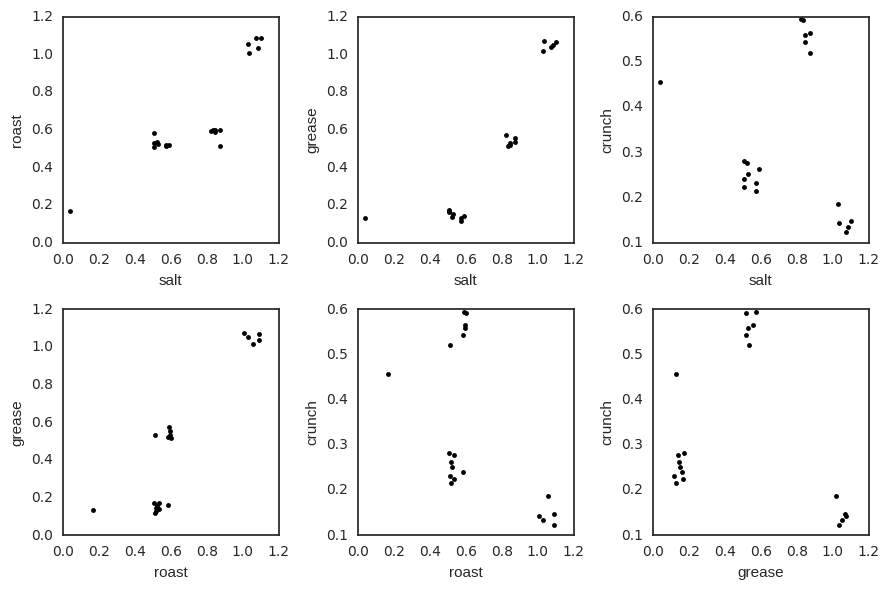

In [110]:
plot_pairs(nuts)

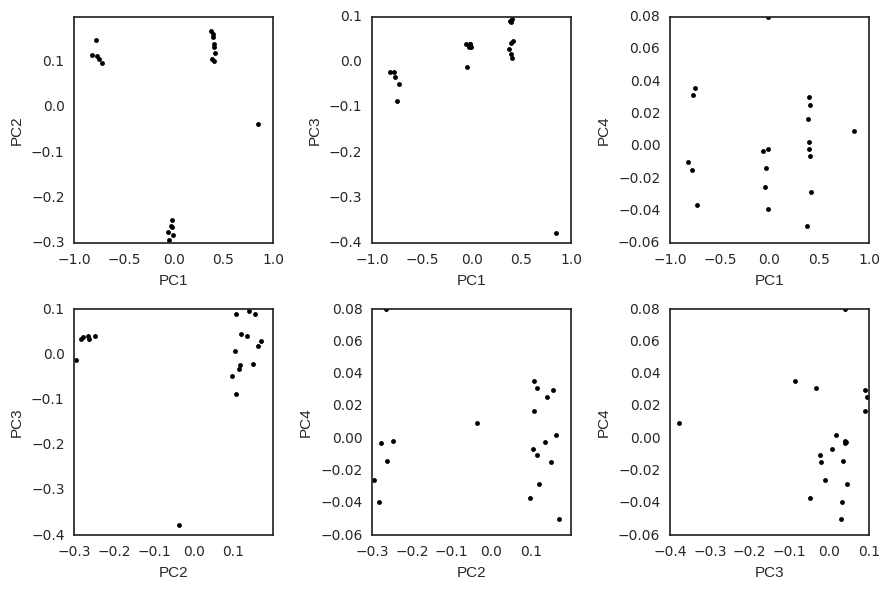

In [116]:
pca = sklearn.decomposition.PCA()
d = pd.DataFrame(pca.fit_transform(nuts), columns=['PC{}'.format(i + 1) for i in range(len(nuts.columns))])
plot_pairs(d)